In [12]:
import sys
import os
from pathlib import Path
import dotenv
import pandas as pd
import pyopenms
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
REPO_DIR = Path(os.getcwd()).parent.parent.parent
dotenv.load_dotenv(REPO_DIR/'.env')
DATA_DIR = Path(os.environ.get('DATA_DIR'))
out_dir = DATA_DIR/'data/van_puyvelde-2022/Protein/DIA/fragpipe/LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01'

edited pin

In [9]:
edited_pin = pd.read_csv(
    out_dir/'LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01-LFQ_TT5600_SWATH_Condition_B_Sample_Alpha_01_edited.pin',
    delimiter='\t'
)

In [10]:
edited_pin.shape

(519587, 49)

In [11]:
edited_pin

,SpecId,Label,ScanNr,ExpMass,retentiontime,rank,precursor_detected,abs_ppm,abs_rt_diff,complementary_ions,...,group_other,15.9949M,unweighted_spectral_entropy,weighted_spectral_entropy,hypergeometric_probability,intersection,pred_RT_real_units,delta_RT_loess,Peptide,Proteins
0,LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01...,-1,3572,1961.9775,3.239400,1,1,4.128379,0.064747,0,...,0,0,0.2179,0.3660,1.0391,2.0,77.9400,123.8096,-.n[42.0106]MEIVLC[57.0215]RPLHQSFYK2.F,rev_ENSP00000380746.1;rev_ENSP00000455217.1;re...
1,LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01...,-1,3573,2044.0455,3.240267,1,1,2.201563,0.054038,0,...,0,1,0.2935,0.4805,3.3064,4.0,71.2423,113.6554,K.KAM[15.9949]DTIIEGVAFQEALHR2.K,rev_ENSP00000216639.3;rev_ENSP00000451412.2;re...
2,LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01...,-1,3573,3077.4250,3.240267,2,1,3.509519,0.004921,0,...,0,0,0.0000,0.0000,0.3474,1.0,112.1151,195.7531,-.n[42.0106]MNGILAVDMLDDDEEGIMFDPSLRSPR3.D,rev_ENSP00000300651.6;rev_ENSP00000538186.1;
3,LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01...,1,3574,2112.0234,3.241134,1,1,3.160647,0.054905,2,...,0,0,0.2711,0.4347,0.9878,3.0,63.5219,101.8718,R.PPGNLQNGEIWELSRC[57.0215]SR2.N,ENSP00000328583.4;
4,LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01...,-1,3574,2185.1013,3.241134,2,1,0.411914,0.004055,1,...,0,0,0.2312,0.3892,1.9693,3.0,81.8382,129.0942,R.QLLQMQFQHDGLGVMVVDK2.C,rev_ENSP00000348657.3;rev_ENSP00000386569.1;re...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519582,LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01...,-1,143325,2298.0503,129.992700,1,1,0.946576,0.055634,0,...,0,1,0.0000,0.0000,-0.0000,0.0,53.4410,117.6851,R.PSGGQHTAAQLQGAM[15.9949]EQLGMDR2.L,rev_ENSP00000455141.1;
519583,LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01...,1,143390,3501.6528,130.051670,1,1,3.438137,0.055664,0,...,0,0,0.0000,0.0000,0.6379,1.0,95.4969,39.9830,K.EADNDPTGEAAANTQQTLTFYELDLGLNHVVR3.K,ENSP00000620069.1;
519584,LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01...,-1,143520,3341.5894,130.169600,1,1,2.962968,0.062210,0,...,0,1,0.0000,0.0000,0.3393,1.0,93.3334,43.9078,R.TEM[15.9949]SSPDSGSNPETLGFC[57.0215]GLLEGKAL...,rev_ENSP00000222214.4;rev_ENSP00000465770.2;re...
519585,LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01...,-1,143845,2302.0550,130.464460,1,1,4.072992,0.062119,0,...,0,0,0.0000,0.0000,0.4708,1.0,59.2103,96.5450,K.EEGPLSAQDVPQMPSQMETTK2.R,rev_ENSP00000369287.1;


\*_rank\*.pepXML

In [23]:
path = str(out_dir/'interact-LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01-LFQ_TT5600_SWATH_Condition_B_Sample_Alpha_01_rank1.pep.xml')
prot_ids, pep_ids = [], pyopenms.PeptideIdentificationList()
pyopenms.PepXMLFile().load(path, prot_ids, pep_ids)

Non-fatal error while loading '/mnt/s3bucket/data/van_puyvelde-2022/Protein/DIA/fragpipe/LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01/interact-LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01-LFQ_TT5600_SWATH_Condition_B_Sample_Alpha_01_rank1.pep.xml': Errors during parsing of aminoacid/terminal modification element:
Non-fatal error while loading '/mnt/s3bucket/data/van_puyvelde-2022/Protein/DIA/fragpipe/LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01/interact-LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01-LFQ_TT5600_SWATH_Condition_B_Sample_Alpha_01_rank1.pep.xml': No modification description given. Trying to define by modification mass.
<Non-fatal error while loading '/mnt/s3bucket/data/van_puyvelde-2022/Protein/DIA/fragpipe/LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01/interact-LFQ_TTOF5600_SWATH_Condition_B_Sample_Alpha_01-LFQ_TT5600_SWATH_Condition_B_Sample_Alpha_01_rank1.pep.xml': Errors during parsing of aminoacid/terminal modification element:> occurred 2 times
Non-fatal error 

In [28]:
keys = []
pep_ids[0].getHits()[0].getKeys(keys)
keys

[b'isotope_error',
 b'hyperscore',
 b'nextscore',
 b'MS:1001330',
 b'_ar_0_score_type',
 b'_ar_0_score',
 b'_ar_0_higher_is_better',
 b'_ar_0_subscore_fval',
 b'_ar_0_subscore_isomassd',
 b'_ar_0_subscore_massd',
 b'_ar_0_subscore_nmc',
 b'_ar_0_subscore_ntt']

In [32]:
pep_ids[0].getScoreType()

'PeptideProphet probability'

In [34]:
pep_ids[0].isHigherScoreBetter()

True

psm.tsv

In [35]:
psm = pd.read_csv(out_dir/'psm.tsv', delimiter='\t')

In [38]:
max(psm['Qvalue'])

0.00277297753486

<Axes: xlabel='Qvalue', ylabel='Count'>

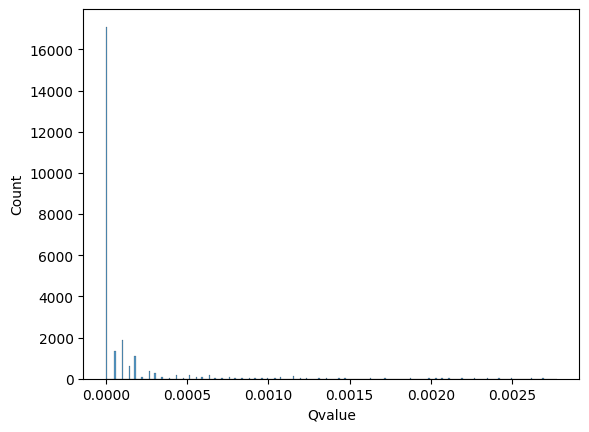

In [37]:
sns.histplot(psm['Qvalue'])